In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#pd.set_option("display.width", 380)
#pd.set_option('max_colwidth', 800)

In [2]:
df = pd.read_csv("./export_articles_EGC_2004_2018.csv", sep='\t')
df

,series,booktitle,year,title,abstract,authors,pdf1page,pdfarticle
0,Revue des Nouvelles Technologies de l'Information,EGC,2018,#Idéo2017 : une plateforme citoyenne dédiée à ...,Cette plateforme a pour objectif de permettre ...,"Claudia Marinica, Julien Longhi, Nader Hassine...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002425
1,Revue des Nouvelles Technologies de l'Information,EGC,2018,A two level co-clustering algorithm for very l...,La classification croisée (co-clustering) est ...,"Marius Barctus, Marc Boullé, Fabrice Clérot",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002372
2,Revue des Nouvelles Technologies de l'Information,EGC,2018,ALGeoSPF: Un modèle de factorisation basé sur ...,La recommandation de points d'intérêts est dev...,"Jean-Benoît Griesner, Talel Abdesssalem, Huber...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002380
3,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse des sentiments à partir des commentair...,L'analyse des sentiments est un processus pend...,"Abdeljalil Elouardighi, Mohcine Maghfour, Hafd...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002397
4,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse en rôles sémantiques pour le résumé au...,Cet article présente une approche visant à ext...,"Elyase Lassouli, Yasmine Mesbahi, Camille Prad...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002384
5,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse Ontologique de scénario dans un contex...,NaN,"Marwan Batrouni, Aurélie Bertaux, Christophe N...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002414
6,Revue des Nouvelles Technologies de l'Information,EGC,2018,Apport de la fouille de données pour la préven...,Avec plus de 800 000 décès par an dans le mond...,"Romain Billot, Sofian Berrouiguet, Mark Larsen...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002376
7,Revue des Nouvelles Technologies de l'Information,EGC,2018,Apport des modèles locaux pour les K-moyennes ...,"Dans le cadre du clustering prédictif, pour at...","Vincent Lemaire, Oumaima Alaoui Ismaili",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002379
8,Revue des Nouvelles Technologies de l'Information,EGC,2018,Apprendre les relations de préférence et de co...,"En classification multi-labels, chaque instanc...","Khalil Laghmari, Christophe Marsala, Mohammed ...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002381
9,Revue des Nouvelles Technologies de l'Information,EGC,2018,Approche contextuelle par régression pour les ...,Les tests A/B sont des procédures utilisées pa...,"Emmanuelle Claeys, Pierre Gançarski, Myriam Ma...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002387


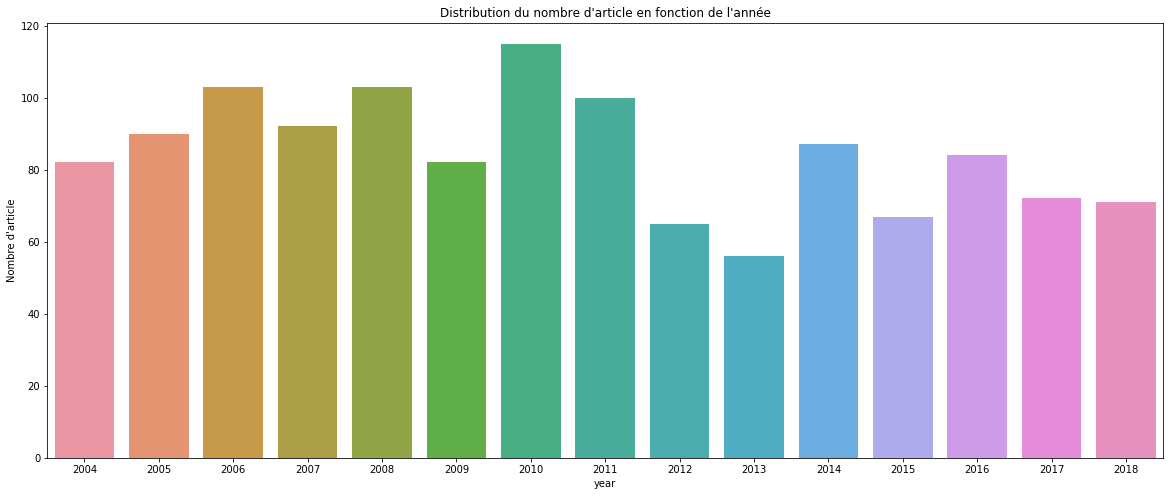

1269 articles


In [3]:
invYr = df.groupby(['year']).count()
sns.barplot(x=invYr.index, y=invYr.series)
plt.title("Distribution du nombre d'article en fonction de l'année")
plt.ylabel("Nombre d'article")
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()
print("%d articles" % len(df))

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re
# nltk.download('punkt')
# nltk.download('stopwords')

In [5]:
%%time
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        # lowercase + remove special characters and digits + Porter's stemming
       # stems.append(PorterStemmer().stem(re.sub("[^A-z -]"," ", item.lower())))
        stems.append(re.sub("[^A-z -]","", item.lower()))
    #vectorize 4-character words or more
    return [s for s in stems if len(s) > 4 ]

# pass function that performs custom tokenization and stemming,
# ignore terms that appear in more than XX% of the documents 
#  and terms that occur in only one document 
# eliminate stop words,
# the ngram len will vary between 1 and 3 word.
tfidf = TfidfVectorizer(
    tokenizer=tokenize,
    max_df=0.40,
    min_df=2,
    #stop_words=[PorterStemmer().stem(w) for w in stopwords.words("french")],
    stop_words=stopwords.words("french"),
    ngram_range=(1, 3),
)
df = df[pd.notnull(df['abstract'])]
X = tfidf.fit_transform(df['abstract'].values)
print("n_samples: %d, n_features: %d" % X.shape)


/info/etu/m2/s142293/lab/fouille_text/venv/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['taient', 'tante', 'tantes', 'tants', 'tions'] not in stop_words.
  sorted(inconsistent))


n_samples: 1096, n_features: 9837
CPU times: user 2.34 s, sys: 12 ms, total: 2.36 s
Wall time: 2.36 s


In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [7]:
%%time

# http://scikit-learn.org/0.15/auto_examples/document_clustering.html

# Performing dimensionality reduction using LSA


# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))



Explained variance of the SVD step: 22%
CPU times: user 11 s, sys: 6.57 s, total: 17.5 s
Wall time: 1.28 s


In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics


In [9]:
%%time
n_clusters = 10
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=10000, n_init=1,
                verbose=False)
km.fit(X)

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Top terms per cluster:
Cluster 0: aborder ability aborde problme aborde abordes abordons problme abordons aboutit acadmique adapte recherche
Cluster 1: abordons problme classification ability aboutir aborde problme activit aborder abords accder adapte donnes achieve
Cluster 2: ability aboutir academic across actifs accessibles according acquises abordons problme adaptes donnes
Cluster 3: ability abordes accessible utilisateurs abords aborde problme access accidents academic above adapt classification
Cluster 4: ability abordons problme about above abords abstraits acadmiques achieve adapter acteur
Cluster 5: ability acadmiques about aboutir acceptables aboutit acteurs accentue actionnables accuracy
Cluster 6: ability aborder above accessible aboutissant accord acteur aborde problme actuels abords
Cluster 7: aborder abordes ability accord addressed above acceptables abstraite aboutir according
Cluster 8: aborde ability abordons abords accder accessible utilisateurs affecte abstraite abo